In [1]:
import pandas as pd

# 导入数据
data = pd.read_csv(
    r"D:\Users\Administrator\source\repos\ML_DL_DA\three_class_data.csv", header=0)
data.head()


,x,y,class
0,0.422221,0.545028,C1
1,0.369920,0.581177,C1
2,0.363025,0.581593,C1
3,0.333464,0.552323,C1
4,0.409722,0.550071,C1


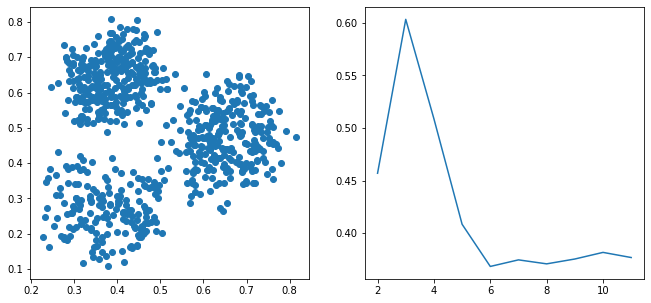

In [14]:
# K-Means计算轮廓系数
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline

X = data[["x", "y"]]
score = []  # 建立模型

# 依次计算 2 到 12 类的轮廓系数
for i in range(10):
    model = KMeans(n_clusters=i+2)
    model.fit(X)
    score.append(silhouette_score(X, model.labels_))

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['x'], data['y'])
plt.subplot(1, 2, 2)
plt.plot(range(2, 12, 1), score)


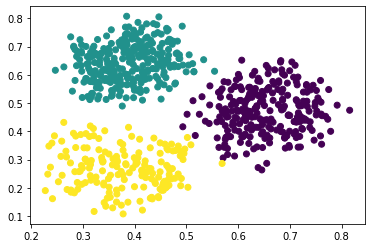

In [15]:
model = KMeans(n_clusters=3)
model.fit(X)
plt.scatter(data['x'], data['y'], c=model.labels_)


d:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


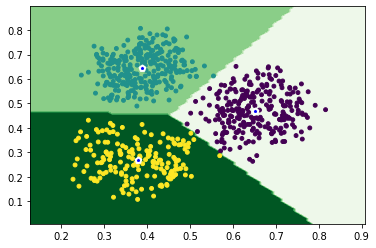

In [16]:
import numpy as np

# 计算聚类过程中的决策边界
x_min, x_max = data['x'].min() - 0.1, data['x'].max() + 0.1
y_min, y_max = data['y'].min() - 0.1, data['y'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                     np.arange(y_min, y_max, .01))

result = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 将决策边界绘制绘制出来
result = result.reshape(xx.shape)
plt.contourf(xx, yy, result, cmap=plt.cm.Greens)
plt.scatter(data['x'], data['y'], c=model.labels_, s=15)
# 绘制聚类中心点
center = model.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], marker='p',
            linewidths=2, color='b', edgecolors='w', zorder=20)


其他聚类算法
除了我们会经常用到的 K-均值聚类算法，scikit-learn 还为我们提供了一些常见的聚类算法。
Mini Batch K-Means
Mini Batch K-Means 整体上和 K-Means 很相似，它是 K-Means 的一个变种形式。与 K-Means 不同的地方在于，其每次从全部数据集中抽样小数据集进行迭代。Mini Batch K-Means 算法在不对聚类效果造成较大影响的前提下，大大缩短了计算时间。
Affinity Propagation
Affinity Propagation 又被称为亲和传播聚类。Affinity Propagation 是基于数据点进行消息传递的理念设计的。与 K-Means 等聚类算法不同的地方在于，亲和传播聚类不需要提前确定聚类的数量，即 k值。但是运行效率较低。
Mean Shift
MeanShift 又被称为均值漂移聚类。Mean Shift 聚类的目的是找出最密集的区域， 同样也是一个迭代过程。在聚类过程中，首先算出初始中心点的偏移均值，将该点移动到此偏移均值，然后以此为新的起始点，继续移动，直到满足最终的条件。Mean Shift 也引入了核函数，用于改善聚类效果。除此之外，Mean Shift 在图像分割，视频跟踪等领域也有较好的应用。
Spectral Clustering
Spectral Clustering 又被称为谱聚类。谱聚类同样也是一种比较常见的聚类方法，它是从图论中演化而来的。谱聚类一开始将特征空间中的点用边连接起来。其中，两个点距离越远，那么边所对应的权值越低。同样，距离越近，那么边对应的权值越高。最后，通过对所有特征点组成的网络进行切分，让切分后的子图互相连接的边权重之和尽可能的低，而各子图内部边组成的权值和经可能高，从而达到聚类的效果。谱聚类的好处是能够识别任意形状的样本空间，并且可以得到全局最优解。
Agglomerative Clustering
Agglomerative Clustering 又被称为层次聚类。层次聚类算法是将所有的样本点自下而上合并组成一棵树的过程，它不再产生单一聚类，而是产生一个聚类层次。层次聚类通过计算各样本数据之间的距离来确定它们的相似性关系，一般情况下，距离越小九代表相似度越高。最后，将相似度越高的样本归为一类，依次迭代，直到生成一棵树。由于层次聚类涉及到循环计算，所以时间复杂度比较高，运行速度较慢。
BIRCH
BIRCH 是英文 Balanced Iterative Reducing and Clustering Using Hierarchies 的简称，它的中文译名为「基于层次方法的平衡迭代规约和聚类」，名字实在太长。BIRCH 引入了聚类特征树（CF 树），先通过其他的聚类方法将其聚类成小的簇，然后再在簇间采用 CF 树对簇聚类。BIRCH 的优点是，只需要单次扫描数据集即可完成聚类，运行速度较快，特别适合大数据集。
DBSCAN
DBSCAN 是英文 Density-based spatial clustering of applications with noise 的简称，它的中文译名为「基于空间密度与噪声应用的聚类方法」，名字同样很长。DBSCAN 基于密度概念，要求聚类空间中的一定区域内所包含的样本数目不小于某一给定阈值。算法运行速度快，且能够有效处理特征空间中存在的噪声点。但是对于密度分布不均匀的样本集合，DBSCAN 的表现较差。

d:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
d:\ProgramData\Miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1044: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=3
  "MiniBatchKMeans is known to have a memory leak on "
d:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MiniBatchKMeans was fitted with feature names
  "X does not have valid feature names, but"
d:\ProgramData\Miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but AffinityPropagation was fitted with feature names
  "X does not have valid feature names, but"
d:\Pr

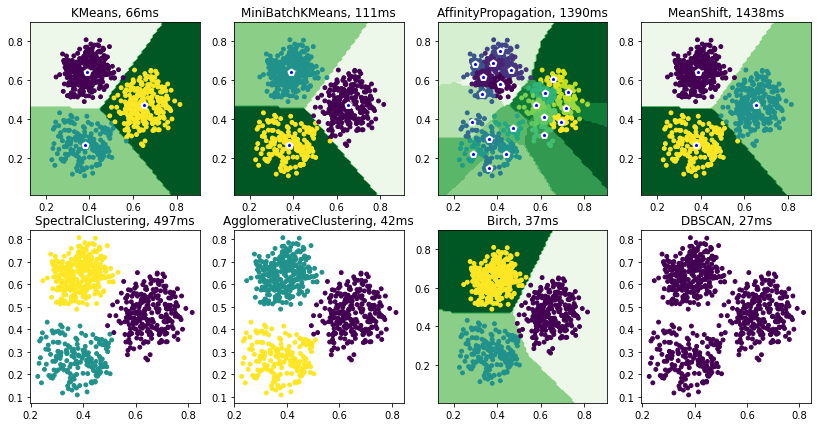

In [18]:
from sklearn import cluster
import time

# 对聚类方法依次命名
cluster_names = ['KMeans', 'MiniBatchKMeans', 'AffinityPropagation', 'MeanShift',
                 'SpectralClustering', 'AgglomerativeClustering', 'Birch', 'DBSCAN']

# 确定聚类方法相应参数
cluster_estimators = [
    cluster.KMeans(n_clusters=3),
    cluster.MiniBatchKMeans(n_clusters=3),
    cluster.AffinityPropagation(),
    cluster.MeanShift(),
    cluster.SpectralClustering(n_clusters=3),
    cluster.AgglomerativeClustering(n_clusters=3),
    cluster.Birch(n_clusters=3, threshold=0.1),
    cluster.DBSCAN()
]

# 为绘制子图准备
plot_num = 1
plt.figure(figsize=(14, 7))
# 依次运行不同的聚类方法
for name, model in zip(cluster_names, cluster_estimators):
    tic = time.time()
    # 建立模型
    model.fit(X)
    # 绘制子图
    plt.subplot(2, len(cluster_estimators) // 2, plot_num)
    # 计算聚类过程中的决策边界
    x_min, x_max = data['x'].min() - 0.1, data['x'].max() + 0.1
    y_min, y_max = data['y'].min() - 0.1, data['y'].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),
                         np.arange(y_min, y_max, .01))
    if hasattr(model, 'predict'):
        result = model.predict(np.c_[xx.ravel(), yy.ravel()])
        # 将决策边界绘制绘制出来
        result = result.reshape(xx.shape)
        plt.contourf(xx, yy, result, cmap=plt.cm.Greens)

    plt.scatter(data['x'], data['y'], c=model.labels_, s=15)
    # 判断方法中是否由 cluster_centers_ 聚类中心参数，并执行不同的命令
    if hasattr(model, 'cluster_centers_'):
        center = model.cluster_centers_
        plt.scatter(center[:, 0], center[:, 1], marker='p',
                    linewidths=2, color='b', edgecolors='w', zorder=20)
    # 计算算法运行时间
    toc = time.time()
    cluster_time = (toc - tic)*1000
    # 绘图
    plt.title(str(name) + ", " + str(int(cluster_time)) + "ms")
    plot_num += 1


,ID,BILL_SEPT,BILL_AUG,BILL_JULY,BILL_JUNE,BILL_MAY,BILL_APRIL,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,AGE,SEX,EDUCATION,MARRIAGE,DEFAULT
0,1,3913,3102,689,0,0,0,0,689,0,0,0,0,24,Female,University,Married,Yes
1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,26,Female,University,Single,Yes
2,3,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,34,Female,University,Single,NO
3,4,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,37,Female,University,Married,NO
4,5,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,57,Male,University,Married,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,20996,50435,50936,49463,50046,19858,19278,2400,0,2300,1000,1000,1000,49,Male,University,Married,Yes
20996,20997,177917,181465,185074,187053,176805,180826,8000,8000,6500,0,7000,6500,38,Male,University,Single,NO
20997,20998,40356,25023,16392,7467,6727,994,1631,1432,1000,520,1097,2236,38,Male,University,Married,NO
20998,20999,80,89691,91517,72739,389,389,90001,3935,3759,390,390,390,32,Male,University,Married,NO


In [21]:
df.columns

Index(['ID', 'BILL_SEPT', 'BILL_AUG', 'BILL_JULY', 'BILL_JUNE', 'BILL_MAY',
       'BILL_APRIL', 'PAY_SEPT', 'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY',
       'PAY_APRIL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'DEFAULT'],
      dtype='object')

In [24]:
df.loc[0]

ID                     1
BILL_SEPT           3913
BILL_AUG            3102
BILL_JULY            689
BILL_JUNE              0
BILL_MAY               0
BILL_APRIL             0
PAY_SEPT               0
PAY_AUG              689
PAY_JULY               0
PAY_JUNE               0
PAY_MAY                0
PAY_APRIL              0
AGE                   24
SEX               Female
EDUCATION     University
MARRIAGE         Married
DEFAULT              Yes
Name: 0, dtype: object

In [27]:
df.columns['Name']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices